In [15]:
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import gamma, kde, kstest
from numpy import inf




%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 2000)
pd.set_option('display.width', 1000)
data_path = "C:\\Users\\augus\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Gmail_df.csv"
data0 = pd.read_csv(data_path)
data_path_write = 'C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\'

In [16]:
data = data0[['time','1day_pop_users']]

In [17]:
data.head()

,time,1day_pop_users
0,2015-03-23 00:00:00-04:00,214.0
1,2015-03-24 00:00:00-04:00,214.0
2,2015-03-25 00:00:00-04:00,212.0
3,2015-03-26 00:00:00-04:00,213.0
4,2015-03-27 00:00:00-04:00,204.0


In [18]:
data.describe()

,1day_pop_users
count,1585.000000
mean,57.934603
std,50.268109
min,0.000000
25%,26.000000
50%,38.000000
75%,61.000000
max,231.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6E5AB5F28>]],
      dtype=object)

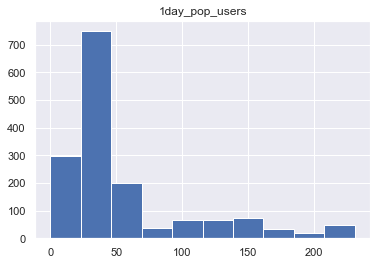

In [19]:
data.hist()

In [20]:
#data = data[(data.T != 0.0).any()]
#data = data[data['1day_pop_users'] != 0]

In [21]:
data['time'] = pd.to_datetime(data['time'],utc=True)
data.set_index('time', inplace=True)


C:\Users\augus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Year')

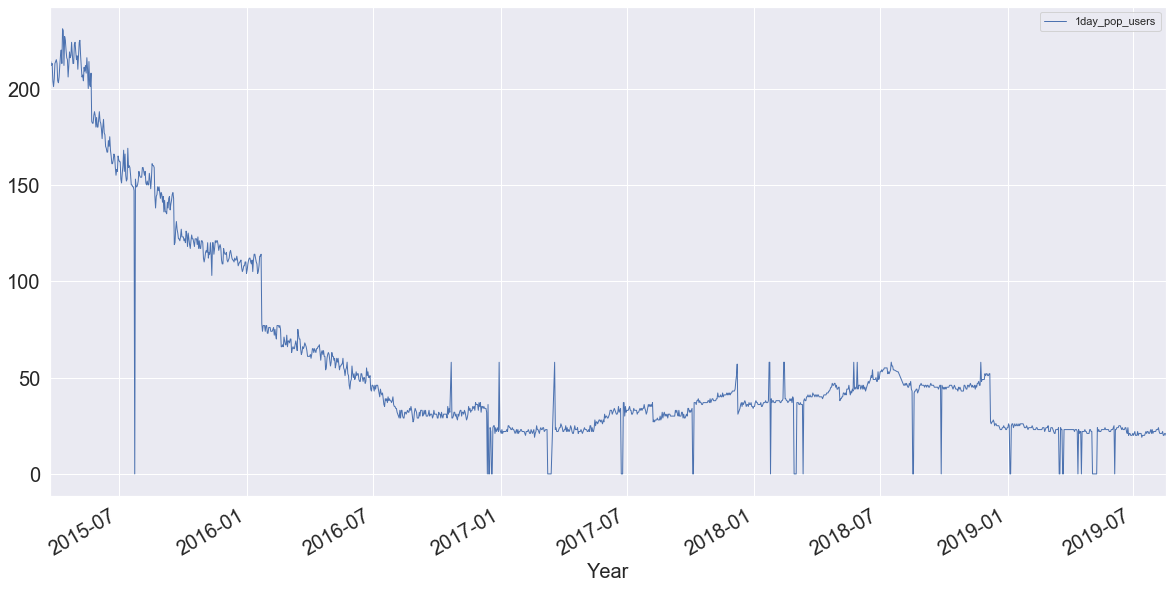

In [22]:
data.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

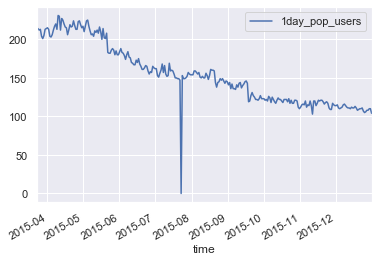

In [23]:
data.loc['2015'].plot()

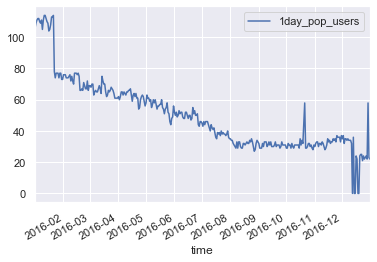

In [24]:
data.loc['2016'].plot()

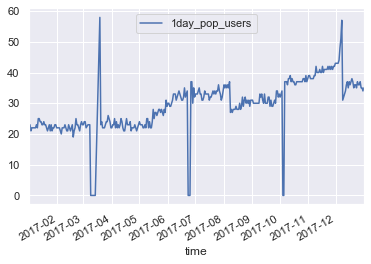

In [25]:
data.loc['2017'].plot()

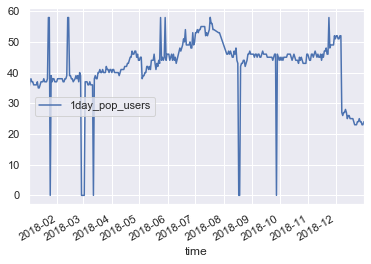

In [26]:
data.loc['2018'].plot()

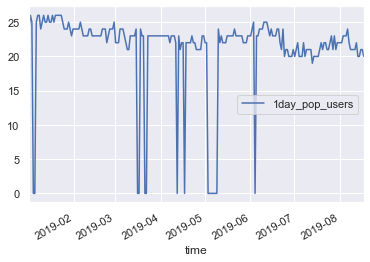

In [27]:
data.loc['2019'].plot()

In [28]:
alpha = gamma.fit(data['1day_pop_users'])[0]
beta = gamma.fit(data['1day_pop_users'])[1]

In [29]:
opu = data['1day_pop_users']

In [30]:
density = kde.gaussian_kde(opu, bw_method=None)

C:\Users\augus\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


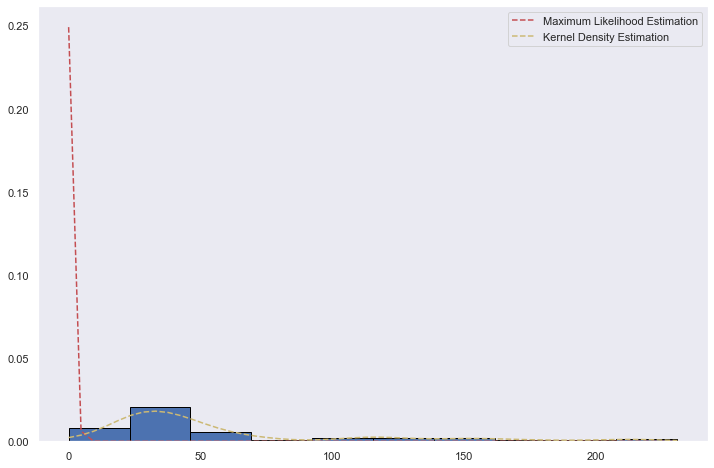

In [31]:
import numpy as np
opu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, opu.max())
xgrid = np.linspace(x.min(), x.max(), 100)

#l1, = plt.plot(x, norm.pdf(x, alpha[-1], beta[-1]), 'm-', label="Method Of Moments")
l2, = plt.plot(x, gamma.pdf(x, alpha, beta), 'r--', label="Maximum Likelihood Estimation")
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l2,l3])

In [32]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])


In [33]:
kstest(opu,my_cdf)

KstestResult(statistic=0.1324906680419728, pvalue=1.0097097835069366e-24)

In [34]:
e = gamma(alpha,beta)

In [35]:
kstest(opu,e.cdf)

KstestResult(statistic=0.9741324816109472, pvalue=0.0)